Este código descarga el zip del dataset de la carpeta de Dropbox  (https://www.dropbox.com/s/jq5mypmx6vmdqdv/dataset.zip?dl=0):

In [2]:
!wget --no-check-certificate \https://www.dropbox.com/s/jq5mypmx6vmdqdv/dataset.zip?dl=0 -O /tmp/dataset.zip

--2020-06-22 00:15:00--  https://www.dropbox.com/s/jq5mypmx6vmdqdv/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/jq5mypmx6vmdqdv/dataset.zip [following]
--2020-06-22 00:15:00--  https://www.dropbox.com/s/raw/jq5mypmx6vmdqdv/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc01cf99f823da8ec43dfd60e063.dl.dropboxusercontent.com/cd/0/inline/A6FZkOFzZj_5dE-0qrGqO4vmQtJGuez8bXoEtpKzawFITSj1fKdHZTlr4fnuiImUqYgFxdHIwcEbsnRORwe7Q0d1Pfl-JlVTFm0dhn22nxEhfb-QylRVDv6D3oR4czxz_n4/file# [following]
--2020-06-22 00:15:00--  https://uc01cf99f823da8ec43dfd60e063.dl.dropboxusercontent.com/cd/0/inline/A6FZkOFzZj_5dE-0qrGqO4vmQtJGuez8bXoEtpKzawFITSj1fKdHZTlr4fnuiImUqYgFxdHIwcEbsnRORwe7Q0d1Pfl-JlVTFm0dhn22nxEhfb-Q

Aquí descomprimimos el zip:

In [3]:
import os
import zipfile

local_zip = '/tmp/dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/dataset')
zip_ref.close()

Guardamos en variables los directorios de las imagenes que necesitaremos para alimentar la red convolucional:

In [4]:
base_dir = '/tmp/dataset'

train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir =       os.path.join(base_dir, 'test')

# Directorio con las imagenes de training
train_0_dir = os.path.join(train_dir, '0')
train_1_dir = os.path.join(train_dir, '1')
train_2_dir = os.path.join(train_dir, '2')
train_3_dir = os.path.join(train_dir, '3')
train_4_dir = os.path.join(train_dir, '4')
train_5_dir = os.path.join(train_dir, '5')

# Directorio con las imagenes de validation
validation_0_dir = os.path.join(validation_dir, '0')
validation_1_dir = os.path.join(validation_dir, '1')
validation_2_dir = os.path.join(validation_dir, '2')
validation_3_dir = os.path.join(validation_dir, '3')
validation_4_dir = os.path.join(validation_dir, '4')
validation_5_dir = os.path.join(validation_dir, '5')

# Directorio con las imagenes de test
test_0_dir = os.path.join(test_dir, '0')
test_1_dir = os.path.join(test_dir, '1')
test_2_dir = os.path.join(test_dir, '2')
test_3_dir = os.path.join(test_dir, '3')
test_4_dir = os.path.join(test_dir, '4')
test_5_dir = os.path.join(test_dir, '5')

Hacemos print de una muestra de archivos de las clases del dataset para poder comprobar que los archivos tienen el formato correcto:

In [5]:
train_0_fnames = os.listdir( train_0_dir )
print(train_0_fnames[:5])

train_1_fnames = os.listdir( train_1_dir )
print(train_1_fnames[:5])

validation_2_fnames = os.listdir( validation_2_dir )
print(validation_2_fnames[:5])

validation_3_fnames = os.listdir( validation_3_dir )
print(validation_3_fnames[:5])

test_4_fnames = os.listdir( test_4_dir )
print(test_4_fnames[:5])

test_5_fnames = os.listdir( test_5_dir )
print(test_5_fnames[:5])

['6d127bb9-144a-4143-a09a-3b3dc1d4ad47.png', 'ebee77bc-9486-4032-928a-ea4ffa9b71c2.png', '6f087a12-28f0-4148-baaf-79e7dd80d456.png', 'e9633fe0-5982-441b-809e-2ab4b35ffc94.png', '6159903a-7d82-42aa-891c-91249c6452e9.png']
['7dbf0131-436c-48e9-82ce-08a74da787ca.png', '83d97c37-8e05-4f44-be11-18362882dcd7.png', '5d5ec475-09a4-4e05-b466-e0e99f98a1c5.png', '3be3c008-ecef-4ce3-b391-14940d27e046.png', 'e6da1296-11ee-435f-8bb4-aa1628d117aa.png']
['fdabfa37-a8c0-4f04-a276-9a3e5cce3f0b.png', '13b81e97-8995-44bb-86be-ec27542be316.png', 'f67ec4fe-71bb-4797-9d94-55274e59b32e.png', 'dd122c8c-bf79-4902-b198-91dba288bc73.png', 'a5609b1a-83b2-40bc-8348-8088063a6642.png']
['d24c9e4d-171e-4165-8ae2-8dd118313fca.png', 'f95997c4-c036-4309-a6b0-7e9d283b2852.png', '52ae1db1-7505-4da7-ab44-f30ade4030a1.png', 'e430a773-8c9b-45c0-ba25-6dc00cca4a6f.png', 'c2882864-8e5e-4f78-b708-5179aba5a29e.png']
['f2404190-f3f4-4bf1-9dbf-9bdc3734cf4c.png', 'bbcb0c89-9f4f-457b-8cbb-3106addbf1f9.png', '98ad6ddd-2cce-4c13-9efc-70

Aquí realizamos un print del total de imagenes de cada clase en entrenamiento, validación y test:

In [6]:
print('total training hands 0 images :', len(os.listdir(train_0_dir ) ))
print('total training hands 1 images :', len(os.listdir(train_1_dir ) ))
print('total training hands 2 images :', len(os.listdir(train_2_dir ) ))
print('total training hands 3 images :', len(os.listdir(train_3_dir ) ))
print('total training hands 4 images :', len(os.listdir(train_4_dir ) ))
print('total training hands 5 images :', len(os.listdir(train_5_dir ) ))

print('total validation hands 0 images :', len(os.listdir( validation_0_dir ) ))
print('total validation hands 1 images :', len(os.listdir( validation_1_dir ) ))
print('total validation hands 2 images :', len(os.listdir( validation_2_dir ) ))
print('total validation hands 3 images :', len(os.listdir( validation_3_dir ) ))
print('total validation hands 4 images :', len(os.listdir( validation_4_dir ) ))
print('total validation hands 5 images :', len(os.listdir( validation_5_dir ) ))

print('total test 0 images :', len(os.listdir( test_0_dir ) ))
print('total test 1 images :', len(os.listdir( test_1_dir ) ))
print('total test 2 images :', len(os.listdir( test_2_dir ) ))
print('total test 3 images :', len(os.listdir( test_3_dir ) ))
print('total test 4 images :', len(os.listdir( test_4_dir ) ))
print('total test 5 images :', len(os.listdir( test_5_dir ) ))

total training hands 0 images : 2400
total training hands 1 images : 2400
total training hands 2 images : 2400
total training hands 3 images : 2400
total training hands 4 images : 2400
total training hands 5 images : 2400
total validation hands 0 images : 600
total validation hands 1 images : 600
total validation hands 2 images : 600
total validation hands 3 images : 600
total validation hands 4 images : 600
total validation hands 5 images : 600
total test 0 images : 600
total test 1 images : 600
total test 2 images : 600
total test 3 images : 600
total test 4 images : 600
total test 5 images : 600


Mostramos algunas imagenes para comprobar el dataset:

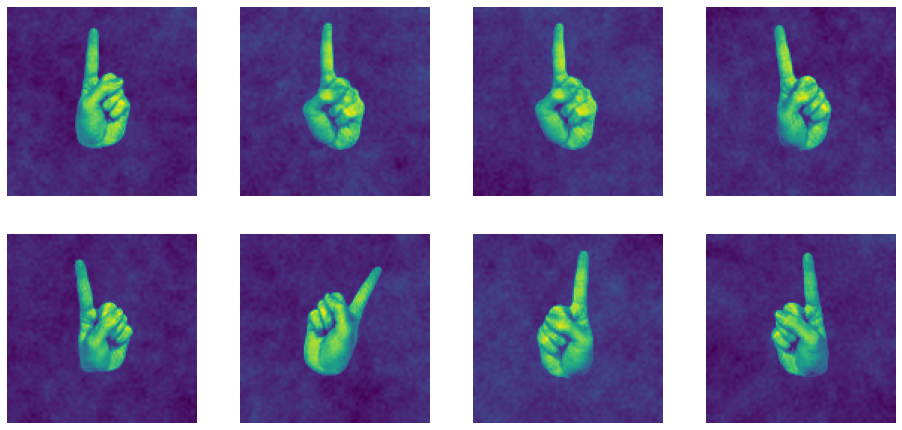

In [7]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0 # Índice para iterar sobre las imagenes

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_pix = [os.path.join(train_1_dir, fname)
                for fname in train_1_fnames[ pic_index-8:pic_index]
]

for i, img_path in enumerate(next_pix):
   sp = plt.subplot(nrows, ncols, i + 1)
   sp.axis('Off') # no imprimir ejes
   img = mpimg.imread(img_path)
   plt.imshow(img)

plt.show()

Aquí definimos el modelo que va a tener esta red convolucional y luego mostramos las capas creadas con el numero de parametros entrenables:

In [16]:
from keras import layers
from keras import models
from keras.applications import VGG16

model = models.Sequential()
model.add(layers.Conv2D(20,(5,5),activation='relu',input_shape=(128,128,1)))
model.add(layers.Conv2D(20,(5,5),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(40,(3,3),activation='relu'))
model.add(layers.Conv2D(40,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(80, (3, 3), activation='relu'))
model.add(layers.Conv2D(80, (3, 3), activation='relu'))
model.add(layers.Conv2D(80, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))



model.add(layers.Flatten())
model.add(layers.Dense(600, activation='relu'))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))


model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 124, 124, 20)      520       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 120, 120, 20)      10020     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 60, 60, 20)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 58, 58, 40)        7240      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 56, 56, 40)        14440     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 40)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 26, 26, 80)       

Aquí fabricamos los generadores del dataset, los cuales suministraran datos al modelo. Tambien podemos especificar si queremos hacer data aumentation y que cambios hacer en las imagenes:

In [9]:
from keras.datasets import mnist
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

##### Aquí hacemos una regularizacion, en concreto un data aumentation.
##### Si no hay data aumentation solo hacemos el reescalado.

datagenAug = ImageDataGenerator( rescale = 1.0/255. ,
                          
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              vertical_flip=True,
                              rotation_range=90
                
                             )

datagen = ImageDataGenerator( rescale = 1.0/255. )

##### Fabricamos los datasets generators

train_generator = datagenAug.flow_from_directory(train_dir,
                  color_mode="grayscale",
                  batch_size=20,
                  class_mode='categorical',
                  target_size=(128, 128))

validation_generator = datagen.flow_from_directory(validation_dir,
                  color_mode="grayscale",
                  batch_size=20,
                  class_mode = 'categorical',
                  target_size = (128, 128))

test_generator = datagen.flow_from_directory(test_dir,
                  color_mode="grayscale",
                  batch_size=20,
                  class_mode = 'categorical',
                  target_size = (128, 128))

##### Calculo pasos por epoca y pasos de validacion
batch_size = 30
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size
print("Pasos por época: " + str(steps_per_epoch) + "    Pasos de validación: " + str(validation_steps))

Found 14400 images belonging to 6 classes.
Found 3600 images belonging to 6 classes.
Found 3600 images belonging to 6 classes.
Pasos por época: 480    Pasos de validación: 120


Finalmente, compilamos el modelo especificando la funcion loss que vamos a usar y entrenamos el modelo con el dataset ya construido:

In [17]:
import keras
##### Compilacion del modelo.

sgd_optimizer = keras.optimizers.SGD(momentum=0.8,nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

##### Entrenamiento del modelo.
history = model.fit(
             train_generator,
             steps_per_epoch= steps_per_epoch,
             epochs=30,
             validation_data=validation_generator,
             validation_steps= validation_steps,
             verbose=2)

Epoch 1/30
 - 21s - loss: 1.7882 - accuracy: 0.1753 - val_loss: 1.7548 - val_accuracy: 0.1671
Epoch 2/30
 - 21s - loss: 1.7192 - accuracy: 0.2488 - val_loss: 1.4311 - val_accuracy: 0.3721
Epoch 3/30
 - 20s - loss: 1.5476 - accuracy: 0.3321 - val_loss: 1.1467 - val_accuracy: 0.4629
Epoch 4/30
 - 20s - loss: 1.3532 - accuracy: 0.4142 - val_loss: 0.8332 - val_accuracy: 0.7346
Epoch 5/30
 - 21s - loss: 1.1905 - accuracy: 0.4888 - val_loss: 0.9876 - val_accuracy: 0.5392
Epoch 6/30
 - 20s - loss: 1.0088 - accuracy: 0.5807 - val_loss: 0.4620 - val_accuracy: 0.8646
Epoch 7/30
 - 20s - loss: 0.7850 - accuracy: 0.6748 - val_loss: 0.4127 - val_accuracy: 0.9296
Epoch 8/30
 - 20s - loss: 0.6613 - accuracy: 0.7415 - val_loss: 0.6257 - val_accuracy: 0.8192
Epoch 9/30
 - 20s - loss: 0.5356 - accuracy: 0.7862 - val_loss: 0.1907 - val_accuracy: 0.9379
Epoch 10/30
 - 21s - loss: 0.4110 - accuracy: 0.8440 - val_loss: 0.1437 - val_accuracy: 0.9683
Epoch 11/30
 - 20s - loss: 0.3382 - accuracy: 0.8709 - val_

Aquí se muestran las variables que nos permiten saber como ha aprendido el modelo:

In [ ]:
history_dict = history.history
print(history_dict.keys())

Con este código fabricamos dos gráficas que nos muestran la evolución de las variables loss y accuracy durante las etapas de entrenamiento y validación:  

No handles with labels found to put in legend.


180/180 [==============================] - 2s 13ms/step
Accuracy for the test set: 0.995555579662323
Loss for the test set: 0.009556682780385017


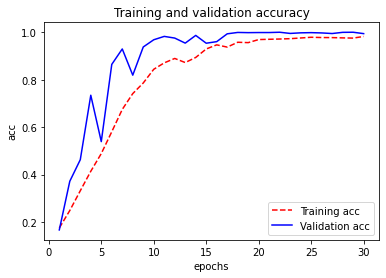

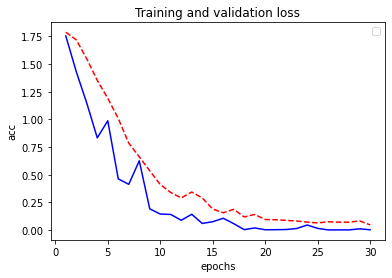

<Figure size 432x288 with 0 Axes>

In [18]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(1,len(acc)+1,1)

plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     loss, 'r--' )
plt.plot ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss'  )
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

metrics_test = model.evaluate(
             test_generator,
             verbose=1)

acc_test    = metrics_test[1]
loss_test   = metrics_test[0]

print(f"Accuracy for the test set: {acc_test}")
print(f"Loss for the test set: {loss_test}")

Este código permite subir una imagen desde un directorio local y predecir su valor usando el modelo previamente entrenado:

In [62]:
import numpy as np
from google.colab import files
import tensorflow as tf

def prediceImagenUsandoModelo( modelo ):

  uploaded=files.upload()

  for fn in uploaded.keys():
    path='/content/' + fn
  img=tf.keras.preprocessing.image.load_img(path, target_size=(128, 128),color_mode="grayscale")
  x=tf.keras.preprocessing.image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  x=x* 1.0/255.
  images = np.vstack([x])

  classes = modelo.predict(images, batch_size=30)
  plt.imshow(img)
  plt.show()

  print("Resultado: "+ str(classes[0]))

  j=0
  for i in classes[0]:
    if i==1:
      print("LA MANO MUESTRA " + str(j) + " DEDOS.")
      break
    j=j+1

Predecir una imagen usando el modelo entrenado en este documento:

Saving 3bb86400-840e-464b-81f8-bd1f0edc5750.png to 3bb86400-840e-464b-81f8-bd1f0edc5750.png


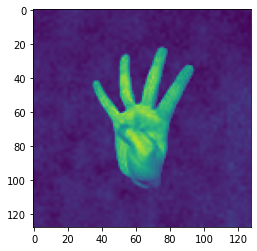

Resultado: [2.7259325e-30 1.5881312e-30 1.1350909e-21 4.7103200e-08 9.9869919e-01
 1.3008143e-03]


In [75]:
prediceImagenUsandoModelo( model )

Este código guarda el modelo en un archivo h5:

In [28]:
#### Introducir nombre del archivo que se va a guardar.
nombreArchivo = 'ivanNetConAumentationPorquePasa'

model.save('/content/' + str(nombreArchivo) + '.h5')

Este código carga un modelo guardado en un documento h5 y predice la imagen proporcionada del directorio local:

In [31]:
from keras.models import load_model

uploaded=files.upload()

for fn in uploaded.keys():
  path='/content/' + fn

loaded_model=load_model(path)

loaded_model.summary()

Saving ivanNetConAumentationPorsi.h5 to ivanNetConAumentationPorsi (2).h5


KeyboardInterrupt: ignored

In [32]:
loaded_model=load_model('/content/ivanNetConAumentationPorquePasa.h5')
loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 124, 124, 20)      520       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 120, 120, 20)      10020     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 60, 60, 20)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 58, 58, 40)        7240      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 56, 56, 40)        14440     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 40)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 26, 26, 80)       

In [35]:
metrics_test = loaded_model.evaluate(
             test_generator,
             verbose=1)

acc_test    = metrics_test[1]
loss_test   = metrics_test[0]

print(f"Accuracy for the test set: {acc_test}")
print(f"Loss for the test set: {loss_test}")

180/180 [==============================] - 2s 14ms/step
Accuracy for the test set: 0.995555579662323
Loss for the test set: 0.009556682780385017


Saving índice9.jpg to índice9 (2).jpg


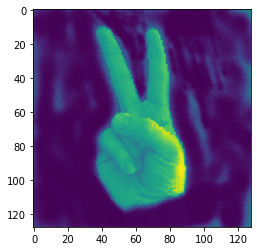

Resultado: [1.3888226e-11 3.5307154e-02 9.4606179e-01 1.8630616e-02 4.9017365e-07
 7.4610908e-12]


In [79]:
prediceImagenUsandoModelo( loaded_model )